In [199]:
import pandas as pd
import numpy as np

In [200]:
df = pd.read_csv('time_series.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [201]:
df.shape

(92016, 5)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [203]:
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [204]:
resample = df.set_index('FullDate').resample('D').sum()
resample

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


Q11

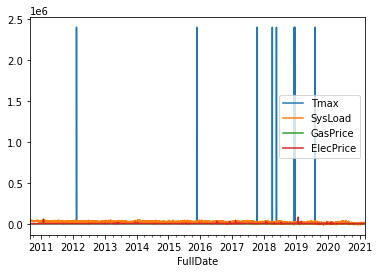

In [205]:
resample.plot();

Q12

In [206]:
from statsmodels.tsa.stattools import adfuller
#pvalue for SysLoad
adf_result = adfuller(resample['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 


ADF Statistic: -3.690158988836651
p-value: 0.00425372550457405
No. of lags used: 30
No. of observations used : 3803
Critical Values:
   1%: -3.432070672988693
   5%: -2.8623002987378547
   10%: -2.567174716967499


In [207]:
#pvalue for GasPrice
adf_result = adfuller(resample['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 


ADF Statistic: -2.902766697165184
p-value: 0.045027212884624954
No. of lags used: 27
No. of observations used : 3806
Critical Values:
   1%: -3.4320693157877544
   5%: -2.8622996992165364
   10%: -2.5671743978048323


Q13

In [208]:
#critical value for ElecPrice
adf_result = adfuller(resample['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 


ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
   1%: -3.432066157296446
   5%: -2.8622983040036005
   10%: -2.5671736550459663


Q14

In [209]:
resample = resample.reset_index()
resample

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [210]:
univariate = resample[['FullDate','ElecPrice']]
univariate  = univariate.rename(columns = {'FullDate':'ds','ElecPrice':'y'})
univariate

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
3829,2021-02-24,634.770
3830,2021-02-25,577.515
3831,2021-02-26,1445.495
3832,2021-02-27,488.980


In [211]:
train_set = univariate.iloc[:2757]
train_set

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
2752,2018-03-15,2717.340
2753,2018-03-16,2277.335
2754,2018-03-17,1718.385
2755,2018-03-18,1088.015


In [212]:
test_set = univariate.iloc[-2757:]
test_set

,ds,y
1077,2013-08-13,1518.215
1078,2013-08-14,1460.680
1079,2013-08-15,2713.205
1080,2013-08-16,1707.565
1081,2013-08-17,1320.565
...,...,...
3829,2021-02-24,634.770
3830,2021-02-25,577.515
3831,2021-02-26,1445.495
3832,2021-02-27,488.980


In [213]:
from prophet import Prophet
model = Prophet()
model.fit(train_set)

22:04:03 - cmdstanpy - INFO - Chain [1] start processing
22:04:03 - cmdstanpy - INFO - Chain [1] done processing


In [214]:
future = model.make_future_dataframe(periods = 10)
forecast = model.predict(future)

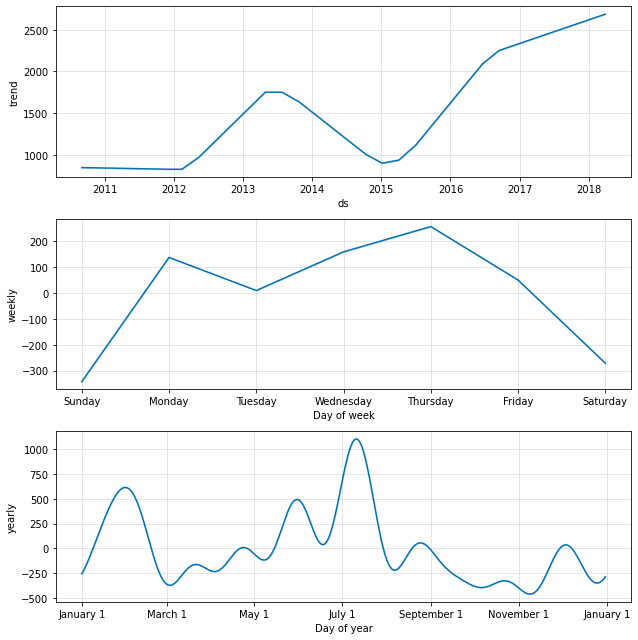

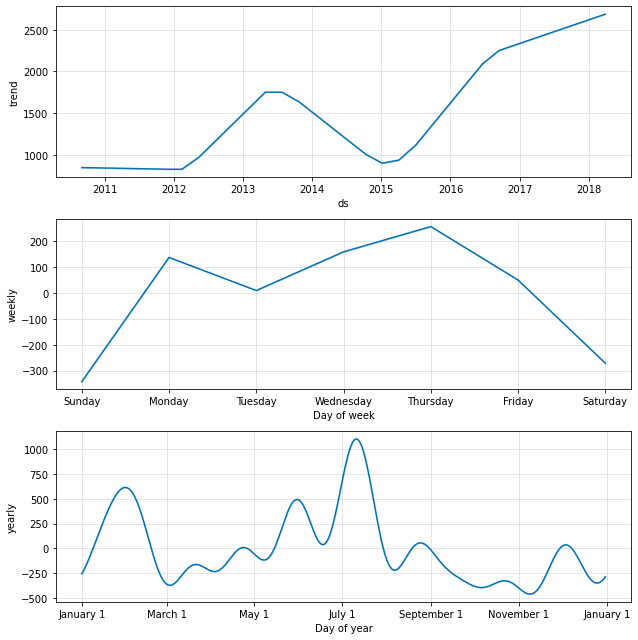

In [215]:
#plot components for univariate
model.plot_components(forecast)